In [1]:
import pickle as pkl
import numpy as np
import pandas
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.metrics import r2_score
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy

In [2]:
# os.chdir("../../../../Desktop/GDrive/opto_data")
os.chdir("G:\My Drive\opto_data")

In [12]:
data = pkl.load(open("final/20sec_processed_optodata_windexing_18jan21.pkl", "rb"))
cdata = pkl.load(open("processed_control_optodata_25may20.pkl", "rb"))

In [5]:
cdata["theta"].Experiment_block_key.unique()

array(['MonkeyG_20150918_Session1_M1', 'MonkeyG_20150918_Session1_S1',
       'MonkeyJ_20160624_Session2_S1', 'MonkeyJ_20160625_Session2_S1'],
      dtype=object)

In [14]:
data['theta']

index  Initial_coh   Distance  Coh_proj     Phase  Pair_avg_net_coh  \
0        492941     0.952099   1.000000  0.683459  0.115350          1.579083   
1        492942     0.944585   2.000000  0.649675  0.017746          1.538488   
2        492943     0.937517   3.000000  0.678204  0.146653          1.573542   
3        492944     0.990136   1.000000  0.687453  0.005484          1.584079   
4        492945     0.898860   1.414214  0.661391  0.219731          1.554808   
...         ...          ...        ...       ...       ...               ...   
481500  1618587     0.063387   6.000000  0.005694  0.122955          0.152660   
481501  1618588     0.057963  10.000000  0.008809  0.247760          0.205058   
481502  1618639     0.060808   4.000000  0.005585  0.041203          0.152782   
481503  1618640     0.048512   8.000000  0.008049  0.152106          0.205179   
481504  1618692     0.087766   4.000000  0.009593  0.068408          0.202203   

        Elec_cov  Time_cov  Avg_coh_to_stim Monkeys  ...  \
0       0.053765  0.013378         0.959928       G  ...   
1       0.050761  0.013337         0.915096       G  ...   
2       0.052848  0.013399         0.960394       G  ...   
3       0.054844  0.011732         0.945288       G  ...   
4       0.050409  0.013670         0.955320       G  ...   
...          ...       ...              ...     ...  ...   
481500 -0.000123 -0.000005         0.052859       J  ...   
481501 -0.001181  0.000083         0.071995       J  ...   
481502 -0.000234 -0.000018         0.055907       J  ...   
481503 -0.001882 -0.000130         0.075043       J  ...   
481504  0.000016  0.000170         0.069279       J  ...   

        Las1_distance_to_further  Las2_distance_to_closer  \
0                      12.083046                 3.605551   
1                      12.083046                 3.162278   
2                      12.083046                 3.000000   
3                      12.083046                 3.605551   
4                      12.083046                 2.828427   
...                          ...                      ...   
481500                  8.944272                 5.385165   
481501                 11.313708                 5.385165   
481502                  8.944272                 5.000000   
481503                 11.313708                 5.000000   
481504                 11.313708                 6.403124   

        Las2_distance_to_further  Coh_diff_mag  End_diff  cond_diff_Y  \
0                       4.242641      0.040484 -0.082712    -0.022078   
1                       4.242641      0.043444 -0.136555    -0.060024   
2                       4.242641      0.048440 -0.085393    -0.021879   
3                       4.242641      0.007034 -0.078851    -0.019558   
4                       4.242641      0.066103 -0.070473    -0.025522   
...                          ...           ...       ...          ...   
481500                  6.403124      0.063213  0.002644    -0.000428   
481501                  9.433981      0.098436  0.006386    -0.003002   
481502                  6.403124      0.063713  0.001775     0.009321   
481503                  9.433981      0.101478  0.022173     0.019418   
481504                  9.433981      0.097796 -0.006776     0.010828   

          diff_Y          Experiment_block_key  From_electrodes  To_electrodes  
0      -0.033715  MonkeyG_20150915_Session2_S1                1              2  
1      -0.046087  MonkeyG_20150915_Session2_S1                1              3  
2      -0.033444  MonkeyG_20150915_Session2_S1                1              4  
3      -0.034019  MonkeyG_20150915_Session2_S1                1              5  
4      -0.049805  MonkeyG_20150915_Session2_S1                1              6  
...          ...                           ...              ...            ...  
481500  0.002644  MonkeyJ_20160702_Session4_S1               90             94  
481501  0.006386  MonkeyJ_20160702_Session4_S1            

In [15]:
# # Get only stim-site data
# local_data = {}
# for band in data.keys():
#     local_data[band] = data[band][(data[band]["Is_stim_site_1"] == 1) & (data[band]["Is_stim_site_2"] == 1)]

In [16]:
# first_data = {}
# first_cdata = {}
# # first_local_data = {}
#
# for band in data.keys():
#     first_data[band] = data[band][data[band]["Block_num"] == 1]
#     first_cdata[band] = cdata[band][cdata[band]["Block_num"] == 1]
#     # first_local_data[band] = local_data[band][local_data[band]["Block_num"] == 1]

In [17]:
# stims_for_compare = list(data["theta"]["Experiment_block_key"].unique()[:12])+list(data["theta"]["Experiment_block_key"].unique()[-12:])
stims_for_compare = list(data["theta"]["Experiment_block_key"].unique())
repr_data = {}
for band in data.keys():
    repr_data[band] = data[band][data[band]["Experiment_block_key"].isin(stims_for_compare)]

In [18]:
all_repr_data = pd.DataFrame()
for band in data.keys():
    repr_data[band]["stim"] = 1
    cdata[band]["stim"] = 0
    repr_data[band]["band"] = band
    cdata[band]["band"] = band

    add_repr_data = repr_data[band].append(cdata[band])
    all_repr_data = all_repr_data.append(add_repr_data)

<AxesSubplot:xlabel='band', ylabel='cond_diff_Y'>

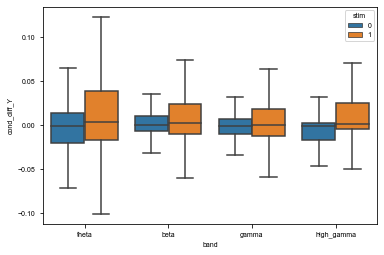

In [19]:
sns.boxplot(data=all_repr_data, y='cond_diff_Y', x='band', hue='stim', showfliers=False)

In [20]:
import matplotlib
new_cmap = sns.color_palette("BuPu", as_cmap=True)
cols = [new_cmap(80), new_cmap(130), new_cmap(170), new_cmap(220)]
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.family'] = "arial"
matplotlib.rcParams['font.size'] = "7"

<AxesSubplot:xlabel='band', ylabel='cond_diff_Y'>

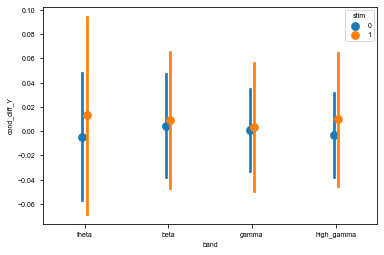

In [21]:
sns.pointplot(data=all_repr_data, y='cond_diff_Y', x='band', hue='stim', marker='o', linestyles='', err_style='bars', dodge=True, ci='sd') #ci=68,
# plt.plot([0, 1, 2, 3], [0, 0,  0, 0])
# plt.savefig('G:\My Drive\GDocuments\\Nature_biomed\\figures\submiss_1\suppl\control_vs_stim_means.pdf')

In [13]:
for band in data.keys():
    print(scipy.stats.ttest_ind(repr_data[band].cond_diff_Y, cdata[band].cond_diff_Y,equal_var=False))

Ttest_indResult(statistic=68.74100263260229, pvalue=0.0)
Ttest_indResult(statistic=57.383953605385734, pvalue=0.0)
Ttest_indResult(statistic=54.65078012948413, pvalue=0.0)
Ttest_indResult(statistic=87.70676375208393, pvalue=0.0)


In [ ]:
break

In [ ]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=[8 , 3], gridspec_kw={'width_ratios': [4, 1]})
sns.pointplot(x='angle', y='reach_time', hue='stimmed', data=dataframe, marker='o', linestyles='', err_style='bars', ci=68, dodge=True, ax=axs[0], errwidth=2, scale=.8)
sns.pointplot(x='stimmed', y='reach_time', data=dataframe, marker='o', linestyles='', err_style='bars', ci=68, ax=axs[1], errwidth=2, scale=.8, hue='stimmed')
# plt.savefig('reachtimes_all.pdf')

In [ ]:
# r squared of all edges

for band in data.keys():
    print(band)
#     sns.plot(x="")

    formula_ys_r2 = "diff_Y ~ cond_diff_Y - 1"
    mod_stim = ols(formula=formula_ys_r2, data=repr_data[band])
    res_stim = mod_stim.fit()
    print(res_stim.rsquared)
    
    formula_ys_r2 = "diff_Y ~ cond_diff_Y - 1"
    mod_control = ols(formula=formula_ys_r2, data=cdata[band])
    res_control = mod_control.fit()
    print(res_control.rsquared)

    print()

In [ ]:
# r squared averages over blocks
## this is what was done

for band in data.keys():
    print(band)

    stim_r2s = []
    for experiment in repr_data["theta"]["Experiment_block_key"].unique():
        for block in range(1, 6):
            sub_data = repr_data[band][repr_data[band]["Experiment_block_key"] == experiment]
            sub_data = sub_data[sub_data["Block_num"] == block]
            formula_ys_r2 = "diff_Y ~ cond_diff_Y - 1"
            mod_stim = ols(formula=formula_ys_r2, data=sub_data)
            res_stim = mod_stim.fit()
#             print(res_stim.rsquared)
            stim_r2s.append(res_stim.rsquared)
    print(np.mean(stim_r2s))
    
    control_r2s = []
    for experiment in cdata["theta"]["Experiment_block_key"].unique():
        for block in range(1, 6):
            sub_data = cdata[band][cdata[band]["Experiment_block_key"] == experiment]
            sub_data = sub_data[sub_data["Block_num"] == block]
            formula_ys_r2 = "diff_Y ~ cond_diff_Y - 1"
            mod_control = ols(formula=formula_ys_r2, data=sub_data)
            res_control = mod_control.fit()
#             print(res_control.rsquared)
            control_r2s.append(res_control.rsquared)
    print(np.mean(control_r2s))

    print()

In [ ]:
i = 0
for res in control_r2s:
    print(i%5 + 1)
    print(res)
    i += 1

In [ ]:
cdata["theta"]["Experiment_block_key"].unique()

In [15]:
# r squared over means of blocks

for band in data.keys():
    print(band)

    stim_cond_diffs = []
    stim_diffs = []
    for experiment in data["theta"]["Experiment_block_key"].unique():
        for block in range(1, 6):
            sub_data = data[band][data[band]["Experiment_block_key"] == experiment]
            sub_data = sub_data[sub_data["Block_num"] == block]
            stim_cond_diffs.append(sub_data["cond_diff_Y"].mean())
            stim_diffs.append(sub_data["diff_Y"].mean())
#             formula_ys_r2 = "diff_Y ~ cond_diff_Y - 1"
#             mod_stim = ols(formula=formula_ys_r2, data=sub_data)
#             res_stim = mod_stim.fit()
#             stim_r2s.append(res_stim.rsquared)
#     print(np.mean(stim_r2s))
    print(r2_score(stim_cond_diffs, stim_diffs))
    print(r2_score(stim_diffs, stim_cond_diffs))
    
    control_cond_diffs = []
    control_diffs = []
    for experiment in cdata["theta"]["Experiment_block_key"].unique():
        for block in range(1, 6):
            sub_data = cdata[band][cdata[band]["Experiment_block_key"] == experiment]
            sub_data = sub_data[sub_data["Block_num"] == block]
            control_cond_diffs.append(sub_data["cond_diff_Y"].mean())
            control_diffs.append(sub_data["diff_Y"].mean())
#             formula_ys_r2 = "diff_Y ~ cond_diff_Y - 1"
#             mod_control = ols(formula=formula_ys_r2, data=cdata[band])
#             res_control = mod_control.fit()
#             control_r2s.append(res_control.rsquared)
#     print(np.mean(control_r2s))
    print(r2_score(control_cond_diffs, control_diffs))
    print(r2_score(control_diffs, control_cond_diffs))

    print()

theta
-0.16507825642239404
0.3117595508761388
0.29784418790759326
0.6575565531928667

beta
-0.1691837408204302
0.3669053265716522
0.21778336029028822
0.14349412846377152

gamma
0.02755860811262545
0.35791173570221013
0.449440964520893
0.5777291419184323

high_gamma
0.053406503773412495
0.13381820082296358
0.15571264358479742
0.15377108225067315



# Is stim having an effect on the network?

In [10]:
cdata.keys()

dict_keys(['theta', 'beta', 'gamma', 'high_gamma'])

In [11]:
data.keys()

dict_keys(['theta', 'beta', 'gamma', 'high_gamma'])

In [12]:
cdata["theta"].columns

Index(['Initial_coh', 'Distance', 'Coh_proj', 'Coh_proj_sd', 'Phase',
       'From_electrodes', 'To_electrodes', 'Initial_coh_sd', 'Coh_diff_sd',
       'Coh_diff_mag', 'Pair_avg_net_coh', 'Pair_avg_net_coh_sd',
       'Graph_avg_net_coh', 'Graph_avg_net_coh_sd', 'Elec_cov', 'Time_cov',
       'End_diff', 'Monkeys', 'Block_num', 'Experiment_block_key', 'Both_M1',
       'Both_S1', 'cond_diff_Y', 'cond_diff_percent_Y', 'diff_Y',
       'diff_percent_Y', 'Is_stim_site_1', 'Is_stim_site_2', 'stim'],
      dtype='object')

In [13]:
cdata["theta"]["Experiment_block_key"].unique()

array(['MonkeyG_20150918_Session1_M1', 'MonkeyG_20150918_Session1_S1',
       'MonkeyJ_20160624_Session2_S1', 'MonkeyJ_20160625_Session2_S1'],
      dtype=object)

In [14]:
stims_for_compare = list(data["theta"]["Experiment_block_key"].unique()[:12])+list(data["theta"]["Experiment_block_key"].unique()[-12:])

In [15]:
stims_for_compare

['MonkeyG_20150915_Session2_S1',
 'MonkeyG_20150915_Session3_S1',
 'MonkeyG_20150915_Session4_S1',
 'MonkeyG_20150915_Session5_S1',
 'MonkeyG_20150916_Session4_S1',
 'MonkeyG_20150917_Session1_S1',
 'MonkeyG_20150917_Session2_S1',
 'MonkeyG_20150917_Session3_S1',
 'MonkeyG_20150921_Session3_S1',
 'MonkeyG_20150921_Session5_S1',
 'MonkeyG_20150922_Session1_S1',
 'MonkeyG_20150922_Session2_S1',
 'MonkeyJ_20160429_Session3_S1',
 'MonkeyJ_20160502_Session1_S1',
 'MonkeyJ_20160624_Session3_S1',
 'MonkeyJ_20160624_Session4_S1',
 'MonkeyJ_20160625_Session4_S1',
 'MonkeyJ_20160625_Session5_S1',
 'MonkeyJ_20160627_Session1_S1',
 'MonkeyJ_20160627_Session2_S1',
 'MonkeyJ_20160630_Session1_S1',
 'MonkeyJ_20160630_Session3_S1',
 'MonkeyJ_20160702_Session2_S1',
 'MonkeyJ_20160702_Session4_S1']

In [16]:
stims_for_compare = list(data["theta"]["Experiment_block_key"].unique()[:12])+list(data["theta"]["Experiment_block_key"].unique()[-12:])
repr_data = {}
for band in data.keys():
    repr_data[band] = data[band][data[band]["Experiment_block_key"].isin(stims_for_compare)]

C:\Users\Julien\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


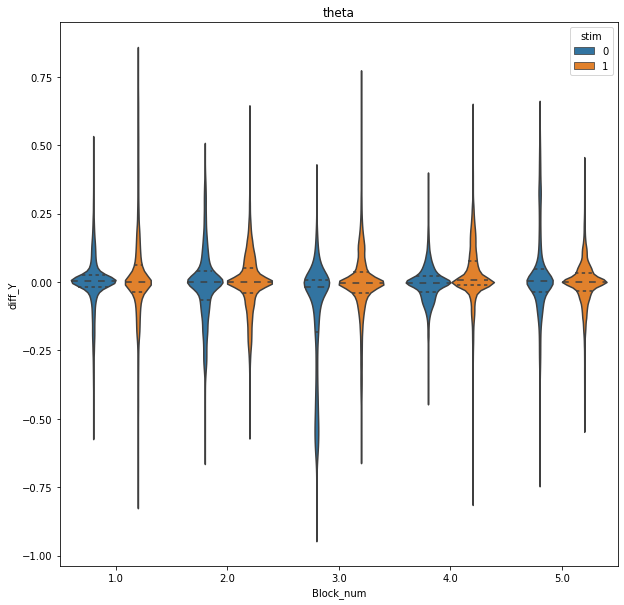

C:\Users\Julien\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


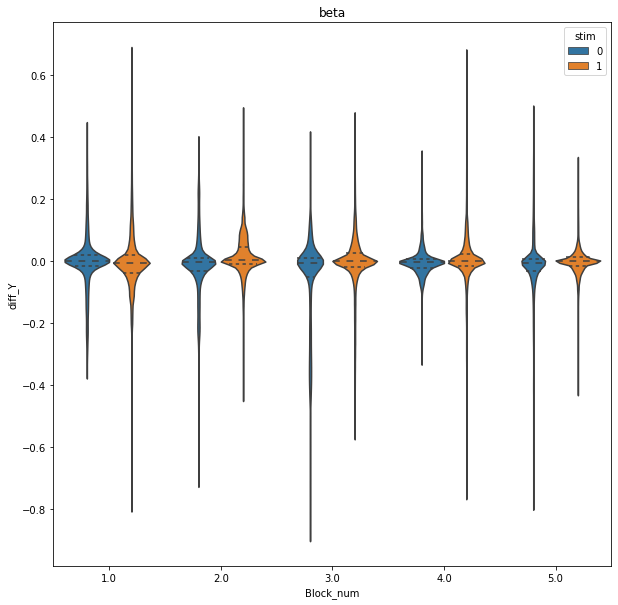

C:\Users\Julien\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


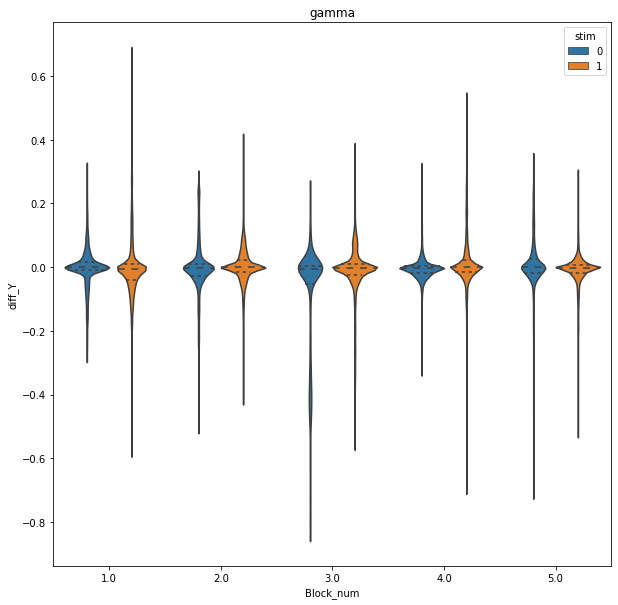

C:\Users\Julien\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


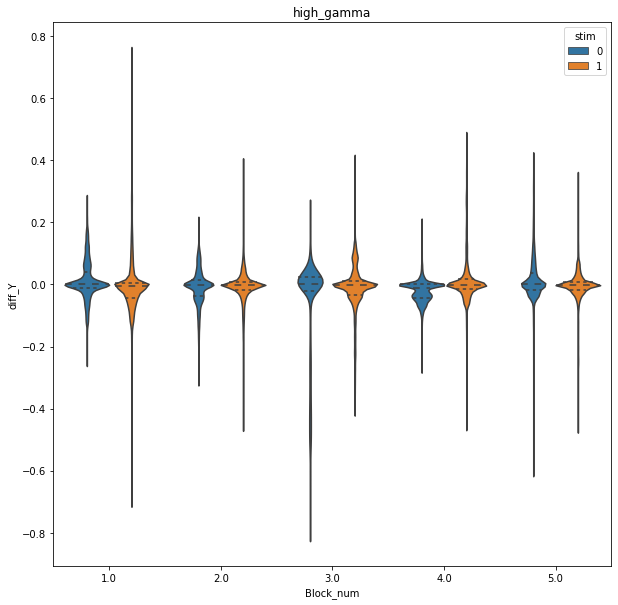

In [17]:
for band in data.keys():
    plt.figure(figsize=(10, 10))
    sns.violinplot("Block_num", "diff_Y", "stim", all_repr_data[band], split=False, inner="quartile")
    plt.title(band)
    plt.show()

## Subsampling time

### Pick four recordings at random

In [12]:
# # All data, by block
# # All features
# # stim

# for band in data.keys():
#     print(band)
#     r2s = []
    
#     experiments = repr_data[band]["Experiment_block_key"].unique()

#     for i in range(30):
#         sample_experiments = experiments[np.random.choice(24, 4, replace=False)]
#         sample_experiments_data = repr_data[band][repr_data[band]["Experiment_block_key"].isin(sample_experiments)]
        
#         formula_all_blockinteract = "diff_Y ~ Block_num + Distance + Phase + Delays + Monkeys + Both_M1 + Both_S1 + \
#         Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further + \
#         Initial_coh + Pair_avg_net_coh  + Elec_cov + Coh_diff_avg + \
#         Coh_proj"
#         mod1 = ols(formula=formula_all_blockinteract, data=sample_experiments_data)
#         res1 = mod1.fit()
# #         print(res1.rsquared)
#         r2s.append(res1.rsquared)
#     print(np.mean(r2s))


In [13]:
# All data, by block
# No protocol
# stim

for band in data.keys():
    print(band)
    r2s = []
    
    experiments = repr_data[band]["Experiment_block_key"].unique()

    for i in range(30):
        sample_experiments = experiments[np.random.choice(24, 4, replace=False)]
        sample_experiments_data = repr_data[band][repr_data[band]["Experiment_block_key"].isin(sample_experiments)]
        
        formula_all_blockinteract = "cond_diff_Y ~ Block_num + Distance + Phase + Monkeys + Both_M1 + Both_S1 + \
        Initial_coh + Pair_avg_net_coh  + Elec_cov + Coh_diff_avg + \
        Coh_proj"
        mod1 = ols(formula=formula_all_blockinteract, data=sample_experiments_data)
        res1 = mod1.fit()
#         print(res1.rsquared)
        r2s.append(res1.rsquared)
    print(np.mean(r2s))


theta
0.2536031011002949
beta
0.18797777997712525
gamma
0.18724637897154733
high_gamma
0.3441195837921765


In [9]:
# All data, by block
# All features
# control

for band in data.keys():
    print(band)
    r2s = []
    formula_all_blockinteract = "cond_diff_Y ~ Block_num + Phase + Monkeys + Both_M1 + Both_S1 + \
    Initial_coh + Pair_avg_net_coh  + Elec_cov + Distance + Coh_diff_mag + \
    Coh_proj" # plus connectivity difference, time covariance...
    mod1 = ols(formula=formula_all_blockinteract, data=cdata[band])
    res1 = mod1.fit()
    print(res1.rsquared)

theta
0.45035579399283265
beta
0.10941382487301532
gamma
0.09123356593844201
high_gamma
0.15314226792093855


### Pick four that make sense for stim

In [143]:
# All data, by block
# All features
# stim

all_r2s = []

for band in data.keys():
    print(band)
    r2s = []
    
    experiments = repr_data[band]["Experiment_block_key"].unique()

    for i, j in itertools.combinations(range(4), 2):
        for k in range(12, 23):
            l = k+1
            
            sample_experiments = experiments[[i, j, k, l]]
            sample_experiments_data = repr_data[band][repr_data[band]["Experiment_block_key"].isin(sample_experiments)]
            formula_all_blockinteract = "diff_Y ~ Block_num + Distance + Phase + Delays + Monkeys + Both_M1 + Both_S1 + \
            Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further + \
            Initial_coh + Pair_avg_net_coh  + Elec_cov + \
            Coh_proj"
            mod1 = ols(formula=formula_all_blockinteract, data=sample_experiments_data)
            res1 = mod1.fit()
            r2s.append(res1.rsquared)
    
    for i, j in itertools.combinations(range(4, 8), 2):
        for k in range(12, 23):
            l = k+1
            
            sample_experiments = experiments[[i, j, k, l]]
            sample_experiments_data = repr_data[band][repr_data[band]["Experiment_block_key"].isin(sample_experiments)]
            formula_all_blockinteract = "diff_Y ~ Block_num + Distance + Phase + Delays + Monkeys + Both_M1 + Both_S1 + \
            Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further + \
            Initial_coh + Pair_avg_net_coh  + Elec_cov + \
            Coh_proj"
            mod1 = ols(formula=formula_all_blockinteract, data=sample_experiments_data)
            res1 = mod1.fit()
            r2s.append(res1.rsquared)
    for i, j in itertools.combinations(range(8, 12), 2):
        for k in range(12, 23):
            l = k+1
            
            sample_experiments = experiments[[i, j, k, l]]
            sample_experiments_data = repr_data[band][repr_data[band]["Experiment_block_key"].isin(sample_experiments)]
            formula_all_blockinteract = "diff_Y ~ Block_num + Distance + Phase + Delays + Monkeys + Both_M1 + Both_S1 + \
            Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further + \
            Initial_coh + Pair_avg_net_coh  + Elec_cov + \
            Coh_proj"
            mod1 = ols(formula=formula_all_blockinteract, data=sample_experiments_data)
            res1 = mod1.fit()
            r2s.append(res1.rsquared)
    print(np.mean(r2s))
    all_r2s.append(r2s)


theta
0.16135574916055445
beta
0.15006341021984373
gamma
0.11290389877492667
high_gamma
0.21358126108121558


In [146]:
for i in range(4):
#     print(data.keys()[i])
    print(np.mean(all_r2s[i]))
    print(np.std(all_r2s[i]))
    print()

0.16135574916055445
0.04813265507851674

0.15006341021984373
0.04485176432380352

0.11290389877492667
0.032501974511470216

0.21358126108121558
0.10969110575381041



# Whole-network model
Replicate these analyses with nonlinear modeling

In [42]:
# All data, whole-session changes
# Only delay

for band in data.keys():
    print(band)
    formula_delay = "End_diff ~ Delays"
    mod1 = ols(formula=formula_delay, data=first_data[band])
    res1 = mod1.fit()
#     print(res1.rsquared)
#     print(res1.f_pvalue)
    
    
    formula_protocol_wholesess = "End_diff ~ Distance + Phase + Delays + Monkeys + Block_num + Both_M1 + Both_S1 + \
    Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further"
    mod2 = ols(formula=formula_protocol_wholesess, data=first_data[band])
    res2 = mod2.fit()
#     print(anova_lm(res1, res2))
    print(res2.summary())
#     print(res1.rsquared)
#     print(res1.mse_total)

    formula_all_wholesess = "End_diff ~ Distance + Phase + Delays + Monkeys + Block_num + Both_M1 + Both_S1 + \
    Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further + \
    Initial_coh + Pair_avg_net_coh  + Elec_cov + \
    Time_cov + Coh_proj + Graph_avg_net_coh + Coh_diff_avg + Avg_stim_diff_btw_elec"
    mod3 = ols(formula=formula_all_wholesess, data=first_data[band])
    res3 = mod3.fit()
#     print(res3.summary())
#     print(anova_lm(res2, res3))

    
    print()

theta
                            OLS Regression Results                            
Dep. Variable:               End_diff   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     819.5
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:59:33   Log-Likelihood:                 28824.
No. Observations:              108598   AIC:                        -5.763e+04
Df Residuals:                  108587   BIC:                        -5.752e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept         


high_gamma
                            OLS Regression Results                            
Dep. Variable:               End_diff   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     227.6
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:59:36   Log-Likelihood:                 76270.
No. Observations:              108598   AIC:                        -1.525e+05
Df Residuals:                  108587   BIC:                        -1.524e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept   

In [32]:
# # All data, whole-session changes
# # All features

# for band in repr_data.keys():
#     print(band)
#     formula_all_wholesess = "End_diff ~ Distance + Phase + Delays + Monkeys + Block_num + Both_M1 + Both_S1 + \
#     Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further + \
#     Initial_coh + Pair_avg_net_coh  + Elec_cov + \
#     Coh_proj + Graph_avg_net_coh + Coh_diff_avg + Avg_stim_diff_btw_elec"
#     mod1 = ols(formula=formula_all_wholesess, data=first_data[band])
#     res1 = mod1.fit()
#     print(res1.rsquared)

theta
0.32124081134880933
beta
0.16826817729130084
gamma
0.21667840894108492
high_gamma
0.2727132750340633


In [53]:
cdata["theta"].columns

Index(['Initial_coh', 'Distance', 'Coh_proj', 'Coh_proj_sd', 'Phase',
       'From_electrodes', 'To_electrodes', 'Initial_coh_sd', 'Coh_diff_sd',
       'Coh_diff_mag', 'Pair_avg_net_coh', 'Pair_avg_net_coh_sd',
       'Graph_avg_net_coh', 'Graph_avg_net_coh_sd', 'Elec_cov', 'Time_cov',
       'End_diff', 'Monkeys', 'Block_num', 'Experiment_block_key', 'Both_M1',
       'Both_S1', 'cond_diff_Y', 'cond_diff_percent_Y', 'diff_Y',
       'diff_percent_Y', 'Is_stim_site_1', 'Is_stim_site_2', 'stim'],
      dtype='object')

# By experiment

In [78]:
# All data, by block
# All features
# stim

for band in data.keys():
    print(band)
    r2s = []
    for experiment in stims_for_compare:
        formula_all_blockinteract = "diff_Y ~ Block_num + Distance + Phase + Delays + Monkeys + Both_M1 + Both_S1 + \
        Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further + \
        Initial_coh + Pair_avg_net_coh  + Elec_cov + \
        Coh_proj"
        mod1 = ols(formula=formula_all_blockinteract, data=repr_data[band][repr_data[band]["Experiment_block_key"]==experiment])
        res1 = mod1.fit()
#         print(res1.rsquared)
        r2s.append(res1.rsquared)
    print(np.mean(r2s))

theta
0.1863177924514802
beta
0.18977628988360054
gamma
0.17402993324677504
high_gamma
0.2825501336309139


In [139]:
# All data, by block
# All features
# control

for band in data.keys():
    print(band)
    r2s = []
    for experiment in cdata[band]["Experiment_block_key"].unique():
        formula_all_blockinteract = "diff_Y ~ Block_num + Phase + Monkeys + Both_M1 + Both_S1 + \
        Initial_coh + Pair_avg_net_coh  + Elec_cov + \
        Coh_proj"
        mod1 = ols(formula=formula_all_blockinteract, data=cdata[band][cdata[band]["Experiment_block_key"] == experiment])
        res1 = mod1.fit()
#         print(res1.rsquared)
        r2s.append(res1.rsquared)
    print(np.mean(r2s))

theta
0.21858002678833335
beta
0.09720981366102058
gamma
0.12086101688141104
high_gamma
0.2480233453124319


In [76]:
# All data, with block interaction
# All features
#stim


for band in data.keys():
    print(band)
    r2s = []
    for experiment in stims_for_compare:
        formula_all_blockinteract = "diff_Y ~ Block_num * (Distance + Phase + Delays + Monkeys + Both_M1 + Both_S1 + \
        Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further + \
        Initial_coh + Pair_avg_net_coh  + Elec_cov + \
        Coh_proj + Coh_diff_avg + Avg_stim_diff_btw_elec)"
        mod1 = ols(formula=formula_all_blockinteract, data=repr_data[band][repr_data[band]["Experiment_block_key"]==experiment])
        res1 = mod1.fit()
#         print(res1.rsquared)
        r2s.append(res1.rsquared)
    print(np.mean(r2s))

theta
0.24294336806332595
beta
0.2537517911789546
gamma
0.2354716426153296
high_gamma
0.38545030469730895


In [77]:
# All data, with block interaction
# All features
#stim

for band in data.keys():
    print(band)
    r2s = []
    for experiment in cdata[band]["Experiment_block_key"].unique():
        formula_all_blockinteract = "diff_Y ~ Block_num * (Phase + Monkeys + Both_M1 + Both_S1 + \
        Initial_coh + Pair_avg_net_coh  + Elec_cov + \
        Coh_proj)"
        mod1 = ols(formula=formula_all_blockinteract, data=cdata[band])
        res1 = mod1.fit()
#         print(res1.rsquared)
        r2s.append(res1.rsquared)
    print(np.mean(r2s))

theta
0.2706952861639632
beta
0.06740308050713051
gamma
0.07657755493841101
high_gamma
0.20460508322509696


In [69]:
repr_data[band]["Experiment_block_key"].unique()[:4]

array(['MonkeyG_20150908_Session2_M1', 'MonkeyG_20150908_Session3_M1',
       'MonkeyG_20150908_Session4_M1', 'MonkeyG_20150909_Session2_M1'],
      dtype=object)

In [80]:
# All data, by block
# All features
# stim

for band in data.keys():
    print(band)
    r2s = []
    for experiment in data[band]["Experiment_block_key"].unique():
        formula_all_blockinteract = "diff_Y ~ Block_num + Distance + Phase + Delays + Monkeys + Both_M1 + Both_S1 + \
        Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further + \
        Initial_coh + Pair_avg_net_coh  + Elec_cov + \
        Coh_proj"
        mod1 = ols(formula=formula_all_blockinteract, data=data[band][data[band]["Experiment_block_key"]==experiment])
        res1 = mod1.fit()
#         print(res1.rsquared)
        r2s.append(res1.rsquared)
    print(np.mean(r2s))

theta
0.23418481399983837
beta
0.19303577938802677
gamma
0.2011116289995685
high_gamma
0.3452154032465396
